In [1]:
!pip install numpy matplotlib scipy

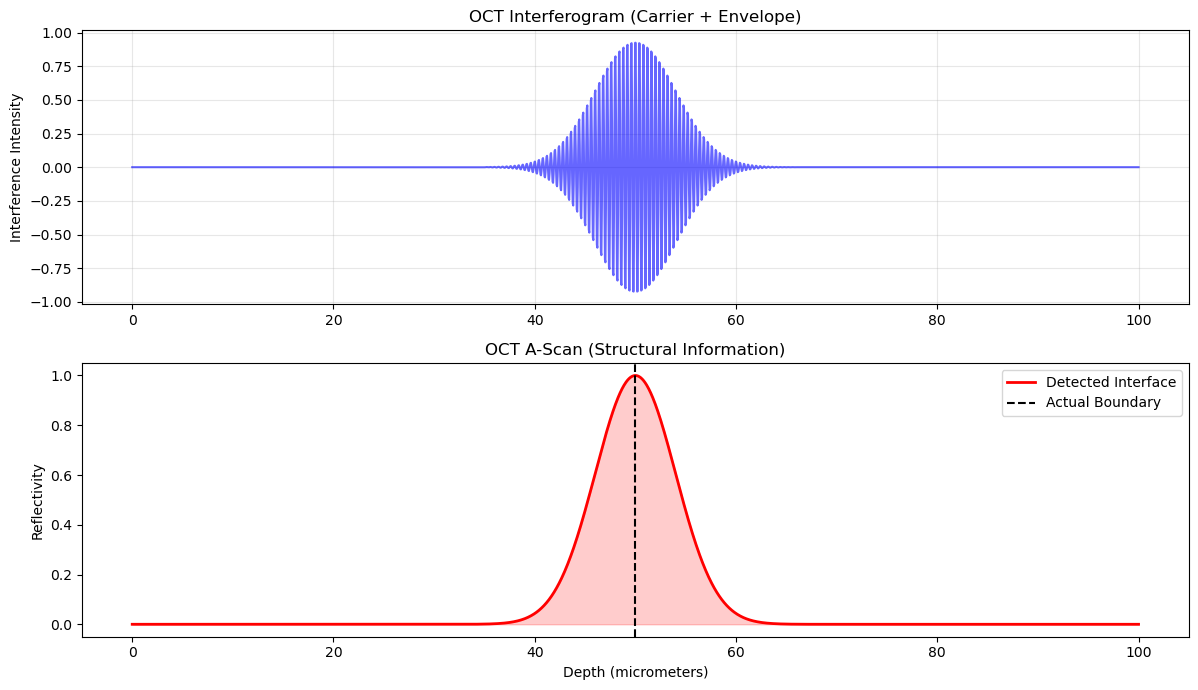

Calculated Axial Resolution: 5.65 micrometers


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Setup Parameters
fs = 1e15          
c = 3e8            
lambda_0 = 800e-9  # Center wavelength (800nm)
bandwidth = 50e-9  # FWHM Bandwidth (50nm)

# 2. Simulate the Depth Scan
z = np.linspace(0, 100e-6, 2000) 
k0 = 2 * np.pi / lambda_0

# FIX: Use the local 'bandwidth' variable, not np.bandwidth
# This formula calculates the coherence length (axial resolution)
sigma_z = (2 * np.log(2) / np.pi) * (lambda_0**2 / bandwidth)

# 3. Simulate a Tissue Interface at 50 micrometers
z_boundary = 50e-6

# 4. Generate the Interferogram
# The interference only occurs when the path lengths match within sigma_z
phase_shift = 2 * k0 * (z - z_boundary)
envelope = np.exp(-((z - z_boundary)**2) / (sigma_z**2))
oct_signal = envelope * np.cos(phase_shift)

# 5. Visualization
plt.figure(figsize=(12, 7))

plt.subplot(2, 1, 1)
plt.plot(z * 1e6, oct_signal, color='blue', alpha=0.6)
plt.title("OCT Interferogram (Carrier + Envelope)")
plt.ylabel("Interference Intensity")
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
plt.plot(z * 1e6, envelope, color='red', linewidth=2, label='Detected Interface')
plt.fill_between(z * 1e6, 0, envelope, color='red', alpha=0.2)
plt.axvline(x=z_boundary*1e6, color='black', linestyle='--', label='Actual Boundary')
plt.title("OCT A-Scan (Structural Information)")
plt.xlabel("Depth (micrometers)")
plt.ylabel("Reflectivity")
plt.legend()

plt.tight_layout()
plt.show()

print(f"Calculated Axial Resolution: {sigma_z * 1e6:.2f} micrometers")